In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

(60000, 28, 28)

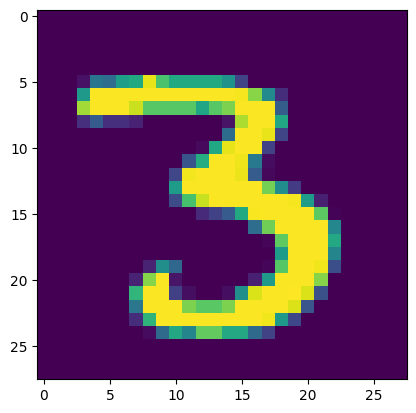

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[12])

Preprocessing

In [14]:

x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32')/255
x_test =x_test.reshape((-1,28,28,1)).astype('float32')/255

x_train.shape

(60000, 28, 28, 1)

# model definition

In [17]:
model = keras.Sequential()
# conv2d layer + BN + Activation

model.add(keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

# max pool
model.add(keras.layers.MaxPool2D(2,2))

#Conv2d layer + BN + Activation
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
# maxPool
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,642 (443.91 KB)

 Trainable params: 113,514 (443.41 KB)

 Non-trainable params: 128 (512.00 B)

In [19]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8528 - loss: 0.5136 - val_accuracy: 0.1135 - val_loss: 2.2808
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9798 - loss: 0.0658 - val_accuracy: 0.1274 - val_loss: 9.8635
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9868 - loss: 0.0429 - val_accuracy: 0.0974 - val_loss: 19.6769
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.0974 - val_loss: 26.8586
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9921 - loss: 0.0261 - val_accuracy: 0.2424 - val_loss: 11.0135
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9931 - loss: 0.0238 - val_accuracy: 0.0974 - val_loss: 85.8759
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.1010 - val_loss: 95.5094
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9955 - loss: 0.0154 - val

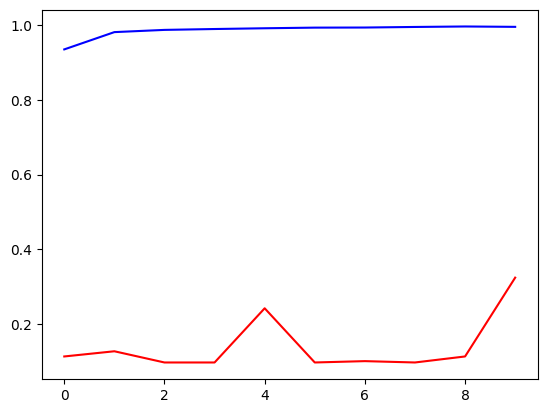

In [21]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')